In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import cv2

from IPython.display import Video

%matplotlib notebook

In [2]:
img_path = 'thai.jpg'

In [3]:
img_bgr = cv2.imread(img_path)
img_bgr_resize = cv2.resize(img_bgr,(img_bgr.shape[1]//4,img_bgr.shape[0]//4))
img_gray = cv2.cvtColor(img_bgr_resize, cv2.COLOR_BGR2GRAY)
img_gray.shape

(191, 256)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f81bc9fa510>,
 <matplotlib.image.AxesImage at 0x7f81bc923e10>)

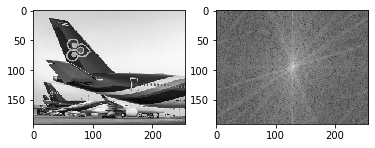

In [4]:
f = np.fft.fft2(img_gray)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121), plt.imshow(img_gray, 'gray')
plt.subplot(122), plt.imshow(magnitude_spectrum, 'gray')

In [5]:
M, N = img_gray.shape
M, N

(191, 256)

In [6]:
r0 = 100
r0

100

In [7]:
ruv = lambda u,v : math.sqrt(math.pow(u - M/2, 2) + math.pow(v - N/2, 2))

In [8]:
Huv = lambda r0, u, v : 1 -math.pow(math.e,   (-math.pow(ruv(0, 0), 2)) / (2*math.pow(r0, 2))   )

In [9]:
F = lambda r0 : [[Huv(r0, u,v) for u in range(N)] for v in range(M)]

In [10]:
mask = F(r0)

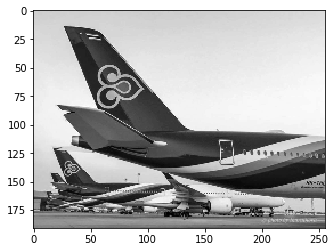

In [11]:
img_back = np.fft.ifft2(mask * fshift)
img_back = np.round(np.abs(img_back))
plt.imshow(img_back, 'gray')

## Init r0

In [12]:
step = 10
m0 = np.min(img_gray.shape)
r0 = np.round(np.linspace(m0/step, m0, step)).astype(np.int)
r0

array([ 19,  38,  57,  76,  96, 115, 134, 153, 172, 191])

In [13]:
mask_list = [F(r) for r in r0]

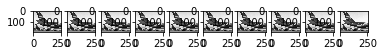

In [14]:
img_back_list = []

for i in range(len(mask_list)):
    img_back = np.fft.ifft2(mask_list[i] * fshift)
    img_back = np.round(np.abs(img_back))
    
    plt.subplot(1, len(mask_list), i+1), plt.imshow(img_back, 'gray')
    
    img_back_list.append(img_back)

## Write Video

In [15]:
filename = 'lab3-2.avi'

output = cv2.VideoWriter(filename,cv2.VideoWriter_fourcc('M','J','P','G'), 1, (img_gray.shape[1], img_gray.shape[0]))

for img in img_back_list:
    img_2d = img.astype(np.uint8)
    img_3d = np.stack((img_2d, img_2d, img_2d), axis=2)

    output.write(img_3d)

output.release()
print("Video file creation successful!")

Video file creation successful!


In [16]:
Video(filename)